Travis, Tianzhe, Zhengwei, Alex

The criterion we used for urban area is:
block groups that have a population density of at least 1,000 people per square mile

In [1]:
import sys
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\bin')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\arcpy')
sys.path.append('C:\\Program Files (x86)\\ArcGIS\\Desktop10.3\\ArcToolbox\\Scripts')
import arcpy 
import geopandas as gpd
import matplotlib.pyplot as plt

fc = "C:\\Users\\wangtz\\Documents\\458\\1_25_inClass\\saep_bg10\\saep_bg10.shp"


arcpy.AddField_management(fc, "Pop_Dens","float")   # 2016 population density
arcpy.AddField_management(fc, "Type","text")         # Type: urban/rural
arcpy.AddField_management(fc, "PDen_2006","float")    # 2006 population density
arcpy.AddField_management(fc, "Change","text")    # Change in category:urbanized, deurbanized, unchange


<Result 'C:\\Users\\wangtz\\Documents\\458\\1_25_inClass\\saep_bg10\\saep_bg10.shp'>

This cell is to look through fields and data

In [7]:
# print "Fields in the file: " + fc
# fieldlist = arcpy.ListFields(fc)
# for curr_field in fieldlist:
#     print curr_field.name
    
# bgrows = arcpy.SearchCursor(fc)
# for row in bgrows:
#     print row.getValue("Pop_Dens")

Variable sets:

In [ ]:
# For 2016: Population density, Total urban/rual area, Total number of urban/rural block groups
urbanCount_2016 = 0
ruralCount_2016 = 0
urbanPop_2016 = 0
urbanLand_2016 = 0

# For 2006: Population density, Total urban/rual area, Total number of urban/rural blocks
urbanCount_2006 = 0
ruralCount_2006 = 0
urbanPop_2006 = 0
urbanLand_2006 = 0

# Total population in both years, total number of block groups, total land area
totalPop_2016 = 0
totalPop_2006 = 0
totalBg = 0
totalLand = 0

# To trace the change of urbanizaiton between 2006 and 2016
urbanized = 0
deurbanized = 0

In [12]:
# Use update cursor
cursor = arcpy.da.UpdateCursor(fc,["Pop_Dens", "ALANDMI", "POP2016", "Type", "POP2006", "PDen_2006", "Change"])

for rows in cursor:
    # filter out block groups of 0 sqmi. of land (all of which are water area)
    if rows[1] == 0:
        rows[0] = 0 #2016 pop den
        rows[5] = 0 #2006 pop den
    else:
        rows[0] = rows[2] / rows[1]   # 2016 pop density
        rows[5] = rows[4] / rows[1]   # 2006 pop density
    # classify urban area, 2016
    if rows[0] >= 1000:
        rows[3] = "Urban"
        # compare popden of 2006 to 2016
        if rows[5] >= 1000:
            rows[6] = "no change in category"         
            urbanCount_2006 += 1
            urbanPop_2006 += rows[4]
            urbanLand_2006 += rows[1]         
        else:
            rows[6] = "Urbanized"
            ruralCount_2006 += 1
            urbanized += 1
        urbanCount_2016 += 1
        urbanPop_2016 += rows[2]
        urbanLand_2016 += rows[1]       
    else:
        rows[3] = "Rural"
        ruralCount_2016 += 1
        if rows[5] >= 1000:
            rows[6] = "deurbanized"         
            urbanCount_2006 += 1
            urbanPop_2006 += rows[4]
            urbanLand_2006 += rows[1]  
            deurbanized += 1
        else:
            rows[6] = "no change in category"
            ruralCount_2006 += 1       
            
    totalBg += 1
    totalLand += rows[1] 
    totalPop_2016 += rows[2]
    totalPop_2006 += rows[4]
    
    #print rows[3]    
    cursor.updateRow(rows)
    
del cursor

In [13]:
# Write code that calculates and prints out to the screen what percentage of the population
# of the state is urbanized in 2016
print 'In 2016, urban population is {}, which is {:.2%} of state population.'.format(int(urbanPop_2016), urbanPop_2016/totalPop_2016)
print ''

In 2016, urban population is 10450492, which is 72.74% of state population.



In [ ]:
# Write code that calculates and prints out to the screen what percentage of the land area
# of the state is urbanized in 2016.
print 'In 2016, urban land is {} sqmi, which is {:.2%} of state area.'.format(urbanLand_2016, urbanLand_2016/totalLand) 
print ''


In [14]:
# Add a field to the Shapefile's data table for whether block groups have 'urbanized', 
# 'no change in category', or 'deurbanized' from 2006 to 2016

# bgrows = arcpy.SearchCursor(fc)
# for row in bgrows:
#     print row.getValue("Change")

no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change in category
no change 

In [21]:
print 'In sum:'
print 'In 2016, urban population is {}, which is {:.2%} of state population.'.format(int(urbanPop_2016), urbanPop_2016/totalPop_2016)
print 'In 2016, urban land is {} sqmi, which is {:.2%} of state area.'.format(urbanLand_2016, urbanLand_2016/totalLand) 
print 'Number of urban block groups is {}'.format(urbanCount_2016) 
print 'Number of rural block groups {}'.format(ruralCount_2016)
print ''

In sum:
In 2016, urban population is 10450492, which is 72.74% of state population.
In 2016, urban land is 2982.234 sqmi, which is 2.24% of state area.
Number of urban block groups is 6830
Number of rural block groups 2736



In [20]:
# Write code that calculates and prints out how many block groups urbanized and how many 
# deurbanized from 2006 to 2016

print 'From 2006 to 2016, {} block groups urbanized, and {} block groups deurbanized.'.format(urbanized, deurbanized)
print ''

print 'In sum:'
print 'In 2006, urban population is {}, which is {:.2%} of state population.'.format(int(urbanPop_2006), urbanPop_2006/totalPop_2006) 
print 'In 2006, urban land is {} sqmi, which is {:.2%} of state area.'.format(urbanLand_2006, urbanLand_2006/totalLand) 
print 'Number of urban block groups is {}'.format(urbanCount_2006) 
print 'Number of rural block groups {}'.format(ruralCount_2006)
print ''

From 2006 to 2016, 152 block groups urbanized, and 8 block groups deurbanized.
	 
In sum:
In 2006, urban population is 9059639, which is 70.56% of state population.
In 2006, urban land is 2678.706 sqmi, which is 2.02% of state area.
Number of urban block groups is 6686
Number of rural block groups 2880



Make a map that portrays an essential perspective on some aspect of your results:
We choose to plot population density of 2016 

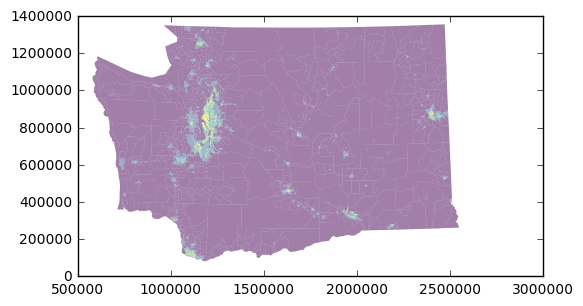

In [9]:
# %matplotlib inline

wa = gpd.read_file(fc)
# wa.head()
wa_plot = wa.plot(column='Pop_Dens', cmap='viridis', edgecolor='none',scheme='quantiles')
plt.show()
